As a DS, we collected the data to understand the current socio-economic status of the people living in Delhi Development Authority Flats and we classified the people as 2 categories: people with income <30000INR and > 30000INR on basis of some variables as shown below.
Based on this information we need to know what are the variables that have high effect on income and we need to develop different strategies to different people to launch the financial products(mutual funds, FD's, Pensions etc).

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from sklearn import metrics

%matplotlib inline

In [41]:
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns

In [42]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices

In [43]:
df = pd.read_csv('survey_ncr.csv')
df.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,47,Private,10th,6,Executive,Unmarried,ST,Female,45,less than 30 k INR
1,40,Private,10th,6,Mechanic,Unmarried,ST,Male,40,less than 30 k INR
2,30,Private,10th,6,Other-service,Unmarried,ST,Male,40,less than 30 k INR
3,27,Private,10th,6,Taxi-driver,Unmarried,ST,Male,75,less than 30 k INR
4,38,Private,10th,6,Driver,Unmarried,Christians,Female,40,less than 30 k INR


In [44]:
df.shape

(29834, 10)

In [70]:
df.describe(percentiles = [0.25,0.5,0.65,0.8,0.9,0.99])

,age,education_num,hours_per_week
count,29834.000000,29834.000000,29834.000000
mean,38.673594,10.159415,41.157203
std,13.011830,2.535954,11.809319
min,18.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
65%,43.000000,10.000000,40.000000
80%,50.000000,13.000000,50.000000
90%,57.000000,13.000000,55.000000
99%,72.000000,16.000000,80.000000


In [45]:
df.columns

Index(['age', 'job_type', 'education', 'education_num', 'job',
       'marital_status', 'religion', 'gender', 'hours_per_week', 'income'],
      dtype='object')

In [46]:
df.dtypes

age                int64
job_type          object
education         object
education_num      int64
job               object
marital_status    object
religion          object
gender            object
hours_per_week     int64
income            object
dtype: object

In [61]:
df.isnull().sum()/len(df)

age               0.0
job_type          0.0
education         0.0
education_num     0.0
job               0.0
marital_status    0.0
religion          0.0
gender            0.0
hours_per_week    0.0
income            0.0
dtype: float64

In [47]:
target = df.loc[:,['income']]
target.head()

,income
0,less than 30 k INR
1,less than 30 k INR
2,less than 30 k INR
3,less than 30 k INR
4,less than 30 k INR


C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


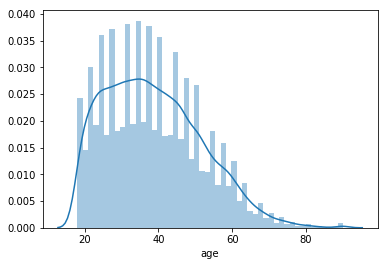

In [48]:
sns.distplot(df.age,hist=True)

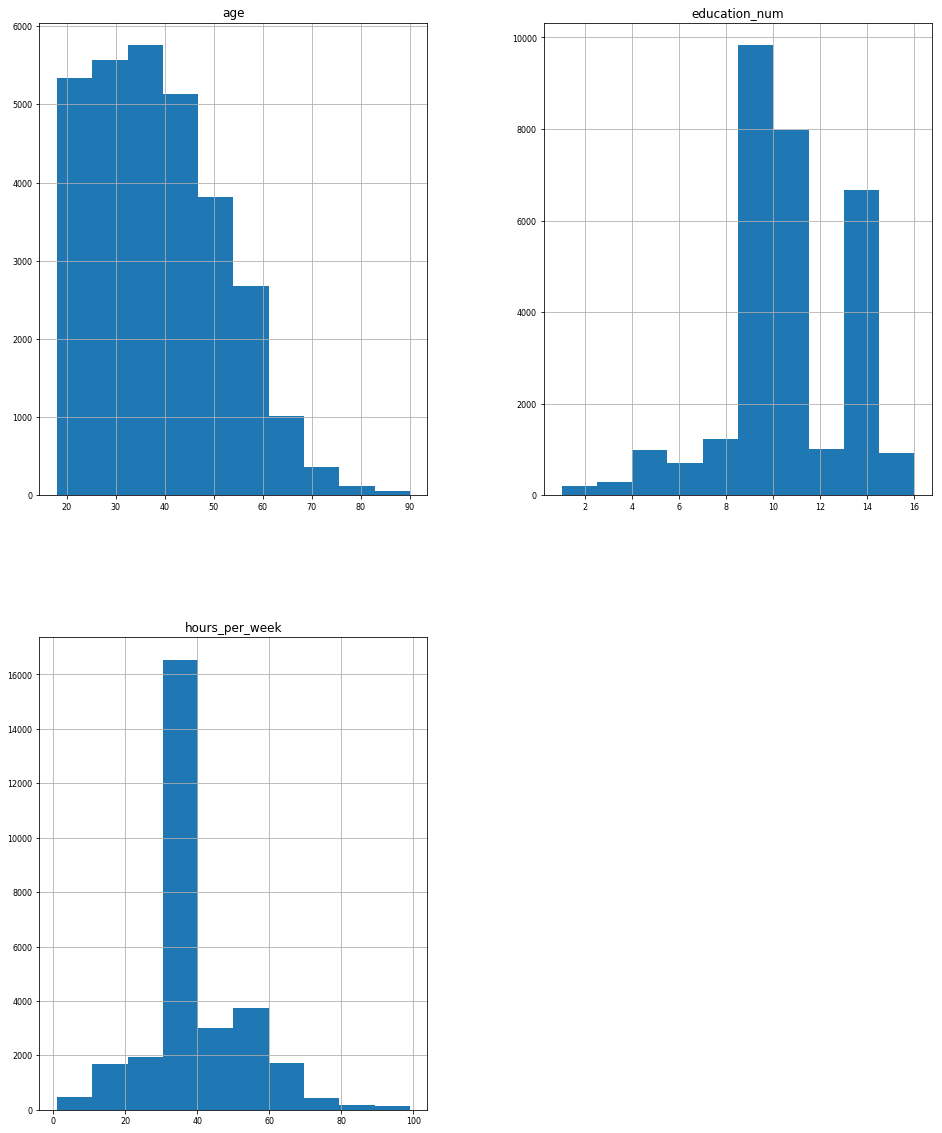

In [49]:
df.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8);

In [50]:
skew(df.age)

0.546179259457834

In [51]:
skew(df.education_num)

-0.3249270155249205

In [52]:
skew(df.hours_per_week)

0.3805994629541925

**The numerical data(age, hours_per_week and edu_num) is only less skewed so there are very less outliers in the data**

In [53]:
df.columns

Index(['age', 'job_type', 'education', 'education_num', 'job',
       'marital_status', 'religion', 'gender', 'hours_per_week', 'income'],
      dtype='object')

In [65]:
df.groupby('income').count()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week
income,,,,,,,,,
less than 30 k INR,22326,22326,22326,22326,22326,22326,22326,22326,22326
more than 30 k INR,7508,7508,7508,7508,7508,7508,7508,7508,7508


**We have class imbalance(> 30000 only 25%)**

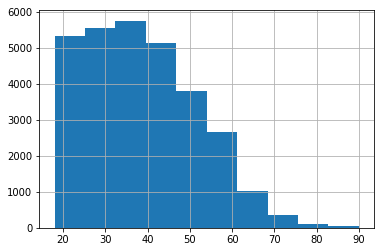

In [55]:
df.age.hist()

In [54]:
df.age.value_counts()

36    852
31    851
33    837
34    836
37    828
35    828
23    824
30    813
28    808
25    799
38    791
32    789
27    789
39    786
29    774
41    769
40    765
24    752
26    745
43    743
42    741
46    711
45    706
44    704
47    683
22    674
20    629
21    621
19    594
50    575
     ... 
59    332
60    276
61    259
62    213
63    186
64    173
65    136
67    111
66    110
68     90
69     80
70     64
71     54
73     49
72     40
74     38
90     35
75     34
76     29
77     20
80     16
79     15
78     14
81     13
84      8
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 71, dtype: int64

We see that a lot of people are from the age group of 30 - 60.
These people will be looking forwrd to invest in mutual funds and fixed deposits. Good schemes can be provided to these category of people.

In [64]:
df.groupby('income').age.median()

income
less than 30 k INR    35
more than 30 k INR    43
Name: age, dtype: int64

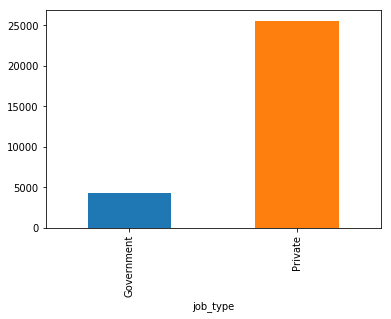

In [68]:
df.groupby('job_type').income.count().plot(kind = 'bar')

**We have a lot of Private employees than Government employees.**

**Also we can provide different Financial services Schemes for these 2 groups.**

In [71]:
df.groupby('job_type').age.median()

job_type
Government    41
Private       37
Name: age, dtype: int64

In [74]:
pd.crosstab(df.job_type,df.education)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Bachelors,College,Doctorate,High School Pass,Masters,Prof-school,diploma,illiterate
job_type,,,,,,,,,,,,,,,
Government,46,49,202,5,13,39,30,943,955,124,1026,567,86,182,5
Private,668,845,1450,146,274,515,402,4101,5721,251,8807,1060,456,826,40


In [75]:
pd.crosstab(df.job_type,df.education_num)

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
job_type,,,,,,,,,,,,,,,,
Government,5,5,13,39,30,46,49,33,1026,955,169,182,943,567,86,124
Private,40,146,274,515,402,668,845,312,8807,5721,1138,826,4101,1060,456,251


We have High school pass people more and there are more people of this category working as private, followed by people with college and bachelors completed people.

Infact we can say that more number of private jobs or may be private bussinesses are belong to these categories.

These people would are more likely of investing and would require more life securities(like insurances) and infact the company would get more numbers from these categories of people.

These people correspond to rougly 65% of business numbers.

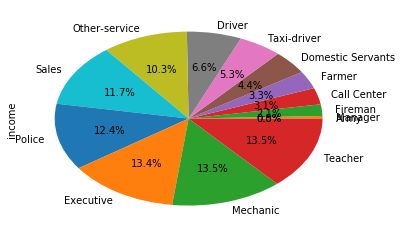

In [90]:
df.groupby(['job']).income.count().sort_values().plot(kind = 'pie',autopct='%1.1f%%');

We have a huge proportion of Teachers, Mechanics and Executive

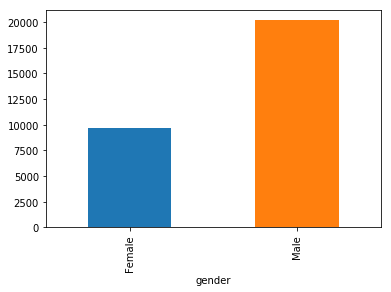

In [98]:
df.groupby('gender').job.count().plot(kind = 'bar')

We have more working males than females

In [91]:
df.groupby('marital_status').income.count()

marital_status
Married      13868
Unmarried    15966
Name: income, dtype: int64

Unmarried people look for investments more than married people since unmarried people dont have any insecurities of thinking about his wife and children as such. So maybe providing good schemes to these folks in a way they find that they would get good income for future may help the organisation.

In [103]:
df.groupby('gender').hours_per_week.mean()

gender
Female    37.212313
Male      43.038066
Name: hours_per_week, dtype: float64

In [106]:
df.groupby(['income','gender']).hours_per_week.mean()

income              gender
less than 30 k INR  Female    36.731338
                    Male      41.414457
more than 30 k INR  Female    40.897482
                    Male      46.542683
Name: hours_per_week, dtype: float64

We see that Males are working more hours than females and because of which we can see that they earn more money than females.

In [108]:
df.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,47,Private,10th,6,Executive,Unmarried,ST,Female,45,less than 30 k INR
1,40,Private,10th,6,Mechanic,Unmarried,ST,Male,40,less than 30 k INR
2,30,Private,10th,6,Other-service,Unmarried,ST,Male,40,less than 30 k INR
3,27,Private,10th,6,Taxi-driver,Unmarried,ST,Male,75,less than 30 k INR
4,38,Private,10th,6,Driver,Unmarried,Christians,Female,40,less than 30 k INR


In [111]:
data = df.loc[:,:]
data.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,47,Private,10th,6,Executive,Unmarried,ST,Female,45,less than 30 k INR
1,40,Private,10th,6,Mechanic,Unmarried,ST,Male,40,less than 30 k INR
2,30,Private,10th,6,Other-service,Unmarried,ST,Male,40,less than 30 k INR
3,27,Private,10th,6,Taxi-driver,Unmarried,ST,Male,75,less than 30 k INR
4,38,Private,10th,6,Driver,Unmarried,Christians,Female,40,less than 30 k INR


In [122]:
data_num = data.loc[:,['age','education_num','hours_per_week']]
data_num.head()

,age,education_num,hours_per_week
0,47,6,45
1,40,6,40
2,30,6,40
3,27,6,75
4,38,6,40


In [131]:
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.head()

,age,education_num,hours_per_week
0,0.115645,-0.277294,0.039212
1,0.018422,-0.277294,-0.011808
2,-0.120467,-0.277294,-0.011808
3,-0.162133,-0.277294,0.345335
4,-0.009355,-0.277294,-0.011808


In [116]:
data_cat = data.loc[:,['job_type','job','marital_status','religion','gender','income']]
data_cat.head()

,job_type,job,marital_status,religion,gender,income
0,Private,Executive,Unmarried,ST,Female,less than 30 k INR
1,Private,Mechanic,Unmarried,ST,Male,less than 30 k INR
2,Private,Other-service,Unmarried,ST,Male,less than 30 k INR
3,Private,Taxi-driver,Unmarried,ST,Male,less than 30 k INR
4,Private,Driver,Unmarried,Christians,Female,less than 30 k INR


In [117]:
data_cat.dtypes

job_type          object
job               object
marital_status    object
religion          object
gender            object
income            object
dtype: object

In [118]:
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [120]:
data_cat_dummies

,job_type_Private,job_Call Center,job_Domestic Servants,job_Driver,job_Executive,job_Farmer,job_Fireman,job_Manager,job_Mechanic,job_Other-service,...,job_Sales,job_Taxi-driver,job_Teacher,marital_status_Unmarried,religion_Hindu,religion_Muslim,religion_Other,religion_ST,gender_Male,income_more than 30 k INR
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
9,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [121]:
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Categorical features : 21


In [133]:
newdata = pd.concat([data_num, data_cat_dummies], axis=1)
newdata.head()

,age,education_num,hours_per_week,job_type_Private,job_Call Center,job_Domestic Servants,job_Driver,job_Executive,job_Farmer,job_Fireman,...,job_Sales,job_Taxi-driver,job_Teacher,marital_status_Unmarried,religion_Hindu,religion_Muslim,religion_Other,religion_ST,gender_Male,income_more than 30 k INR
0,0.115645,-0.277294,0.039212,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.018422,-0.277294,-0.011808,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,-0.120467,-0.277294,-0.011808,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
3,-0.162133,-0.277294,0.345335,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
4,-0.009355,-0.277294,-0.011808,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [134]:
newdata.corr()

,age,education_num,hours_per_week,job_type_Private,job_Call Center,job_Domestic Servants,job_Driver,job_Executive,job_Farmer,job_Fireman,...,job_Sales,job_Taxi-driver,job_Teacher,marital_status_Unmarried,religion_Hindu,religion_Muslim,religion_Other,religion_ST,gender_Male,income_more than 30 k INR
age,1.000000,0.019638,0.073311,-0.082925,-0.021660,-0.100659,-0.019560,0.106186,0.039671,0.004037,...,-0.021934,0.029396,0.056097,-0.302859,0.029351,-0.015269,-0.032163,-0.012986,0.078566,0.235566
education_num,0.019638,1.000000,0.131257,-0.156225,0.056908,-0.136646,-0.176001,0.198367,-0.110807,0.002718,...,0.032636,-0.130339,0.427848,-0.074500,0.054592,-0.075934,-0.049008,-0.029878,0.002247,0.330897
hours_per_week,0.073311,0.131257,1.000000,0.021382,-0.024815,-0.049411,-0.009554,0.126862,0.093158,0.021753,...,0.004818,0.070679,0.042457,-0.213583,0.060557,-0.063597,-0.005739,-0.004260,0.230663,0.223404
job_type_Private,-0.082925,-0.156225,0.021382,1.000000,-0.016436,0.051695,0.093859,-0.001552,0.047959,-0.233114,...,0.139768,0.019150,-0.191038,0.008866,0.060923,-0.066824,0.018176,-0.029100,0.046821,-0.053565
job_Call Center,-0.021660,0.056908,-0.024815,-0.016436,1.000000,-0.038049,-0.047113,-0.069744,-0.032708,-0.026298,...,-0.064680,-0.041814,-0.070117,0.011119,0.006779,-0.012192,-0.008814,-0.009329,-0.019533,0.021879
job_Domestic Servants,-0.100659,-0.136646,-0.049411,0.051695,-0.038049,1.000000,-0.056912,-0.084251,-0.039511,-0.031768,...,-0.078134,-0.050512,-0.084701,0.054559,-0.018186,0.026031,0.001929,0.014448,0.091725,-0.093049
job_Driver,-0.019560,-0.176001,-0.009554,0.093859,-0.047113,-0.056912,1.000000,-0.104321,-0.048923,-0.039336,...,-0.096747,-0.062545,-0.104879,-0.010313,-0.038820,0.039577,0.035864,0.000516,0.026330,-0.077635
job_Executive,0.106186,0.198367,0.126862,-0.001552,-0.069744,-0.084251,-0.104321,1.000000,-0.072423,-0.058232,...,-0.143220,-0.092588,-0.155258,-0.103218,0.046505,-0.046785,-0.021945,-0.007982,0.030853,0.211612
job_Farmer,0.039671,-0.110807,0.093158,0.047959,-0.032708,-0.039511,-0.048923,-0.072423,1.000000,-0.027309,...,-0.067165,-0.043421,-0.072811,-0.042779,0.032891,-0.032728,0.005504,0.001366,0.101111,-0.057039
job_Fireman,0.004037,0.002718,0.021753,-0.233114,-0.026298,-0.031768,-0.039336,-0.058232,-0.027309,1.000000,...,-0.054004,-0.034912,-0.058543,-0.035706,-0.023188,0.030193,0.000327,0.004578,0.065731,0.025935


In [135]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]).codes # Replace strings with an integer

In [136]:
data

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week,income
0,47,1,0,6,4,1,4,0,45,0
1,40,1,0,6,8,1,4,1,40,0
2,30,1,0,6,9,1,4,1,40,0
3,27,1,0,6,12,1,4,1,75,0
4,38,1,0,6,3,1,0,0,40,0
5,54,1,0,6,9,1,2,0,10,0
6,61,1,0,6,9,1,2,0,24,0
7,29,1,0,6,3,1,2,0,25,0
8,51,1,0,6,8,1,2,0,35,0
9,45,1,0,6,9,1,2,0,38,0


In [140]:
preds = data.iloc[:,:9]
preds.head()

,age,job_type,education,education_num,job,marital_status,religion,gender,hours_per_week
0,47,1,0,6,4,1,4,0,45
1,40,1,0,6,8,1,4,1,40
2,30,1,0,6,9,1,4,1,40
3,27,1,0,6,12,1,4,1,75
4,38,1,0,6,3,1,0,0,40


In [141]:
res = data.iloc[:,9]
res.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int8

In [146]:
x_train,x_test, y_train, y_test = train_test_split(preds, res, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (20883, 9)
x_test  (8951, 9)
y_train  (20883,)
y_test  (8951,)


In [147]:
from imblearn.over_sampling import SMOTE
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(x_train_res.shape))

Before UpSampling, counts of label '1': 5291
Before UpSampling, counts of label '0': 15592 

After UpSampling, counts of label '1': 15592
After UpSampling, counts of label '0': 15592 

After UpSampling, the shape of train_X: (31184, 9)
After UpSampling, the shape of train_y: (31184, 9) 



# RANDOM FOREST

In [193]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=1) 

In [194]:
rfcl = rfcl.fit(x_train_res, y_train_res)

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [195]:
rfcl.score(x_train_res , y_train_res)

0.9499102103642894

In [196]:
test_pred = rfcl.predict(x_test)
rfcl.score(x_test , y_test)

0.7900793207462853

# GRADIENT BOOSTING

In [197]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1) 
gbcl = gbcl.fit(x_train_res, y_train_res)

In [198]:
gbcl.score(x_train_res , y_train_res)

0.8395651616213443

In [199]:
test_pred = gbcl.predict(x_test)
gbcl.score(x_test , y_test)

0.7947715339068261

# TUNING HYPER-PARAMETERS

In [ ]:
n_estimators = 50,max_depth=5,min_samples_split=3,
n_estimators = 50,

In [200]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [201]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [212]:
rf_random = RandomizedSearchCV(estimator=rfcl, param_distributions=random_grid,
                              n_iter = 5, scoring=ftwo_scorer,refit =False, 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train_res, y_train_res);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.0s finished


In [214]:
from sklearn.model_selection import RandomizedSearchCV

In [215]:
best_random = rf_random.best_estimator_

best_random.score(X_test , y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
from sklearn.model_selection import GridSearchCV

In [229]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [222]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0,scoring = ftwo_scorer, return_train_score=True)

In [223]:
grid_search.fit(x_train_res, y_train_res);

In [224]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 6}

In [228]:
best_grid.score(x_train_res, y_train_res)

0.8261929194458697

In [225]:
best_grid = grid_search.best_estimator_
best_grid.score(x_test, y_test)

0.7630432353926936